<a href="https://colab.research.google.com/github/Sahil-Pattanayak/Capstone-Project/blob/main/Falcon_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 1 // COLLECTING THE DATA**


In [ ]:
import requests
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])



In [ ]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

# Using json_normalize method to convert the json result into a dataframe
response = requests.get(static_json_url)
data = pd.json_normalize(response.json())

print(data.head())



       static_fire_date_utc  static_fire_date_unix    tbd    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False  False     0.0   
1                      None                    NaN  False  False     0.0   
2                      None                    NaN  False  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False  False     0.0   
4                      None                    NaN  False  False     0.0   

                     rocket  success  \
0  5e9d0d95eda69955f709d1eb    False   
1  5e9d0d95eda69955f709d1eb    False   
2  5e9d0d95eda69955f709d1eb    False   
3  5e9d0d95eda69955f709d1eb     True   
4  5e9d0d95eda69955f709d1eb     True   

                                                                                                                                                                                details  \
0                                                                                                                  

In [ ]:
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])
data['date'] = pd.to_datetime(data['date_utc']).dt.date
data = data[data['date'] <= datetime.date(2020, 11, 13)]

BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

getBoosterVersion(data)
getLaunchSite(data)
getPayloadData(data)
getCoreData(data)



In [ ]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [ ]:
# Creating a data from launch_dict
df = pd.DataFrame(launch_dict)

# Filtering the data dataframe to only include Falcon 9 launches
data_falcon9 = df[df['BoosterVersion'] != 'Falcon 1']

data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))

# Calculating the mean value of PayloadMass column
payload_mass_mean = data_falcon9['PayloadMass'].mean()
payload_mass_mean

6123.547647058824

In [ ]:
# Replacing the np.nan values with its mean value
data_falcon9['PayloadMass'].replace(np.nan, payload_mass_mean, inplace=True)

# Verifying that there are no more missing values in the PayloadMass column
print(data_falcon9['PayloadMass'].isnull().sum())


0


<ipython-input-6-3dcce69fb5b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass'].replace(np.nan, payload_mass_mean, inplace=True)


In [ ]:
# First few rows of the final dataframe
print(data_falcon9.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             1  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
5             2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
6             3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
7             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
8             5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5         

In [ ]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

# **MODULE 1 // Part-II**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import unicodedata

# Helper functions
def date_time(table_cells):
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    out = ''.join([booster_version for i, booster_version in enumerate(table_cells.strings) if i % 2 == 0][0:-1])
    return out

def landing_status(table_cells):
    return [i for i in table_cells.strings][0]

def get_mass(table_cells):
    mass = unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass = mass[0:mass.find("kg")+2]
    else:
        new_mass = 0
    return new_mass

def extract_column_from_header(row):
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    column_name = ' '.join(row.contents)

    if not(column_name.strip().isdigit()):
        column_name = column_name.strip()
        return column_name

# Main code
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"



In [ ]:
# Task 1: Request the Falcon9 Launch Wiki page
response = requests.get(static_url)
soup = BeautifulSoup(response.text, 'html.parser')



In [ ]:
# Task 2: Extract all column/variable names from the HTML table header
html_tables = soup.find_all('table')
first_launch_table = html_tables[2]

column_names = []
for th in first_launch_table.find_all('th'):
    name = extract_column_from_header(th)
    if name is not None and len(name) > 0:
        column_names.append(name)



In [ ]:
# Task 3: Create a data frame by parsing the launch HTML tables

# Initializing the launch_dict with all necessary keys
launch_dict = {}
for col in column_names:
    launch_dict[col] = []

# Removing the 'Date and time ( )' key as it's not needed
if 'Date and time ( )' in launch_dict:
    del launch_dict['Date and time ( )']

# Adding specific keys that might not be in column_names but are needed
launch_dict['Date'] = []
launch_dict['Time'] = []
launch_dict['Version Booster'] = []
launch_dict['Booster landing'] = []

extracted_row = 0
for table_number, table in enumerate(soup.find_all('table', "wikitable plainrowheaders collapsible")):
    for rows in table.find_all("tr"):
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False
        row = rows.find_all('td')
        if flag:
            extracted_row += 1

            # Flight Number
            launch_dict['Flight No.'].append(flight_number)

            # Date and Time
            date_time_list = date_time(row[0])
            launch_dict['Date'].append(date_time_list[0].strip(','))
            launch_dict['Time'].append(date_time_list[1])

            # Version Booster
            bv = booster_version(row[1])
            if not bv:
                bv = row[1].a.string if row[1].a else ''
            launch_dict['Version Booster'].append(bv)

            # Launch site
            launch_dict['Launch site'].append(row[2].a.string if row[2].a else '')

            # Payload
            launch_dict['Payload'].append(row[3].a.string if row[3].a else '')

            # Payload mass
            launch_dict['Payload mass'].append(get_mass(row[4]))

            # Orbit
            launch_dict['Orbit'].append(row[5].a.string if row[5].a else '')

            # Customer
            launch_dict['Customer'].append(row[6].a.string if row[6].a else '')

            # Launch outcome
            launch_dict['Launch outcome'].append(list(row[7].strings)[0] if row[7].strings else '')

            # Booster landing
            launch_dict['Booster landing'].append(landing_status(row[8]))

# Creating a DataFrame from the dictionary
df = pd.DataFrame(launch_dict)

print(df.head())


  Flight No. Launch site                               Payload Payload mass  \
0          1       CCAFS  Dragon Spacecraft Qualification Unit            0   
1          2       CCAFS                                Dragon            0   
2          3       CCAFS                                Dragon       525 kg   
3          4       CCAFS                          SpaceX CRS-1     4,700 kg   
4          5       CCAFS                          SpaceX CRS-2     4,877 kg   

  Orbit Customer Launch outcome             Date   Time   Version Booster  \
0   LEO   SpaceX      Success\n      4 June 2010  18:45  F9 v1.07B0003.18   
1   LEO     NASA        Success  8 December 2010  15:43  F9 v1.07B0004.18   
2   LEO     NASA        Success      22 May 2012  07:44  F9 v1.07B0005.18   
3   LEO     NASA      Success\n   8 October 2012  00:35  F9 v1.07B0006.18   
4   LEO     NASA      Success\n     1 March 2013  15:10  F9 v1.07B0007.18   

  Booster landing  
0         Failure  
1         Failure  
2 

In [ ]:
df = pd.DataFrame({key:pd.Series(value) for key, value in launch_dict.items()})

# Exporting to CSV
df.to_csv('spacex_web_scraped.csv', index=False)

# **MODULE 1 // WEB SCRAPPING**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import unicodedata

# Helper functions
def date_time(table_cells):
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    out = ''.join([booster_version for i, booster_version in enumerate(table_cells.strings) if i % 2 == 0][0:-1])
    return out

def landing_status(table_cells):
    return [i for i in table_cells.strings][0]

def get_mass(table_cells):
    mass = unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass = mass[0:mass.find("kg")+2]
    else:
        new_mass = 0
    return new_mass

def extract_column_from_header(row):
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    column_name = ' '.join(row.contents)

    if not(column_name.strip().isdigit()):
        column_name = column_name.strip()
        return column_name

# URL of the Wikipedia page
url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

# Task 1: Request the Falcon9 Launch Wiki page
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Task 2: Extract column names
html_tables = soup.find_all('table')
first_launch_table = html_tables[2]

column_names = []
for th in first_launch_table.find_all('th'):
    name = extract_column_from_header(th)
    if name is not None and len(name) > 0:
        column_names.append(name)

# Task 3: Create a data frame by parsing the launch HTML tables
launch_dict = {}
for col in column_names:
    launch_dict[col] = []

# Removing the 'Date and time ( )' key as it's not needed
if 'Date and time ( )' in launch_dict:
    del launch_dict['Date and time ( )']



In [ ]:
# Adding specific keys that might not be in column_names but are needed
launch_dict['Date'] = []
launch_dict['Time'] = []
launch_dict['Version Booster'] = []
launch_dict['Booster landing'] = []

extracted_row = 0
for table_number, table in enumerate(soup.find_all('table', "wikitable plainrowheaders collapsible")):
    for rows in table.find_all("tr"):
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False
        row = rows.find_all('td')
        if flag:
            extracted_row += 1

            # Flight Number
            launch_dict['Flight No.'].append(flight_number)

            # Date and Time
            date_time_list = date_time(row[0])
            launch_dict['Date'].append(date_time_list[0].strip(','))
            launch_dict['Time'].append(date_time_list[1])

            # Version Booster
            bv = booster_version(row[1])
            if not bv:
                bv = row[1].a.string if row[1].a else ''
            launch_dict['Version Booster'].append(bv)

            # Launch site
            launch_dict['Launch site'].append(row[2].a.string if row[2].a else '')

            # Payload
            launch_dict['Payload'].append(row[3].a.string if row[3].a else '')

            # Payload mass
            launch_dict['Payload mass'].append(get_mass(row[4]))

            # Orbit
            launch_dict['Orbit'].append(row[5].a.string if row[5].a else '')

            # Customer
            launch_dict['Customer'].append(row[6].a.string if row[6].a else '')

            # Launch outcome
            launch_dict['Launch outcome'].append(list(row[7].strings)[0] if row[7].strings else '')

            # Booster landing
            launch_dict['Booster landing'].append(landing_status(row[8]))

# Creating a DataFrame from the dictionary
df = pd.DataFrame(launch_dict)

print(df.head())



  Flight No. Launch site                               Payload Payload mass  \
0          1       CCAFS  Dragon Spacecraft Qualification Unit            0   
1          2       CCAFS                                Dragon            0   
2          3       CCAFS                                Dragon       525 kg   
3          4       CCAFS                          SpaceX CRS-1     4,700 kg   
4          5       CCAFS                          SpaceX CRS-2     4,877 kg   

  Orbit Customer Launch outcome             Date   Time   Version Booster  \
0   LEO   SpaceX      Success\n      4 June 2010  18:45  F9 v1.07B0003.18   
1   LEO     NASA        Success  8 December 2010  15:43  F9 v1.07B0004.18   
2   LEO     NASA        Success      22 May 2012  07:44  F9 v1.07B0005.18   
3   LEO     NASA      Success\n   8 October 2012  00:35  F9 v1.07B0006.18   
4   LEO     NASA      Success\n     1 March 2013  15:10  F9 v1.07B0007.18   

  Booster landing  
0         Failure  
1         Failure  
2 

In [ ]:
# Saving the DataFrame to a CSV file
df.to_csv('spacex_web_scraped.csv', index=False)
print("Data saved to 'spacex_web_scraped.csv'")

Data saved to 'spacex_web_scraped.csv'


# **MODULE 2 // EDA with SQL**

In [ ]:
# Setup
%load_ext sql
import csv, sqlite3
import pandas as pd

# Connecting to the database
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Loading data into the database
%sql sqlite:///my_data1.db

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")



101

In [ ]:
# Creating clean table
%sql DROP TABLE IF EXISTS SPACEXTABLE;
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

# Task 1: Display the names of the unique launch sites
%sql SELECT DISTINCT Launch_Site FROM SPACEXTABLE;


 * sqlite:///my_data1.db
Done.
 * sqlite:///my_data1.db
Done.
 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [ ]:
# Task 2: Display 5 records where launch sites begin with the string 'CCA'
%sql SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [ ]:
# Task 3: Display the total payload mass carried by boosters launched by NASA (CRS)
%sql SELECT SUM(PAYLOAD_MASS__KG_) as Total_Payload_Mass FROM SPACEXTABLE WHERE Customer = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
45596


In [ ]:
# Task 4: Display average payload mass carried by booster version F9 v1.1
%sql SELECT AVG(PAYLOAD_MASS__KG_) as Avg_Payload_Mass FROM SPACEXTABLE WHERE Booster_Version = 'F9 v1.1';

 * sqlite:///my_data1.db
Done.


Avg_Payload_Mass
2928.4


In [ ]:
# Task 5: List the date when the first successful landing outcome in ground pad was achieved
%sql SELECT MIN(Date) as First_Success_Date FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


First_Success_Date
2015-12-22


In [ ]:
# Task 6: List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
%sql SELECT DISTINCT Booster_Version FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (drone ship)' AND PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [ ]:
# Task 7: List the total number of successful and failure mission outcomes
%sql SELECT Mission_Outcome, COUNT(*) as Count FROM SPACEXTABLE GROUP BY Mission_Outcome;

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Count
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [ ]:
# Task 8: List the names of the booster_versions which have carried the maximum payload mass
%sql SELECT DISTINCT Booster_Version FROM SPACEXTABLE WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [ ]:
# Task 9: List the records which will display the month names, failure landing_outcomes in drone ship, booster versions, launch_site for the months in year 2015
%sql SELECT substr(Date, 6, 2) as Month, Landing_Outcome, Booster_Version, Launch_Site FROM SPACEXTABLE WHERE substr(Date, 0, 5) = '2015' AND Landing_Outcome LIKE 'Failure (drone ship)';


 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [ ]:
# Task 10: Rank the count of landing outcomes between the date 2010-06-04 and 2017-03-20, in descending order
%sql SELECT Landing_Outcome, COUNT(*) as Count FROM SPACEXTABLE WHERE Date BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY Landing_Outcome ORDER BY Count DESC;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


# **MODULE 2 // EDA with Data Visualization**

<Figure size 1200x600 with 0 Axes>

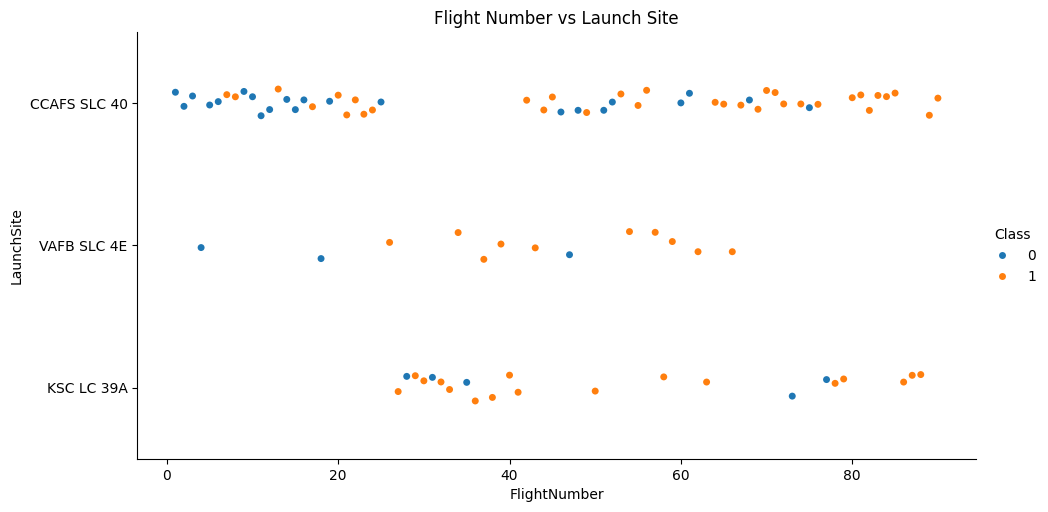

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# TASK 1: Visualize the relationship between Flight Number and Launch Site
plt.figure(figsize=(12, 6))
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.title("Flight Number vs Launch Site")
plt.show()


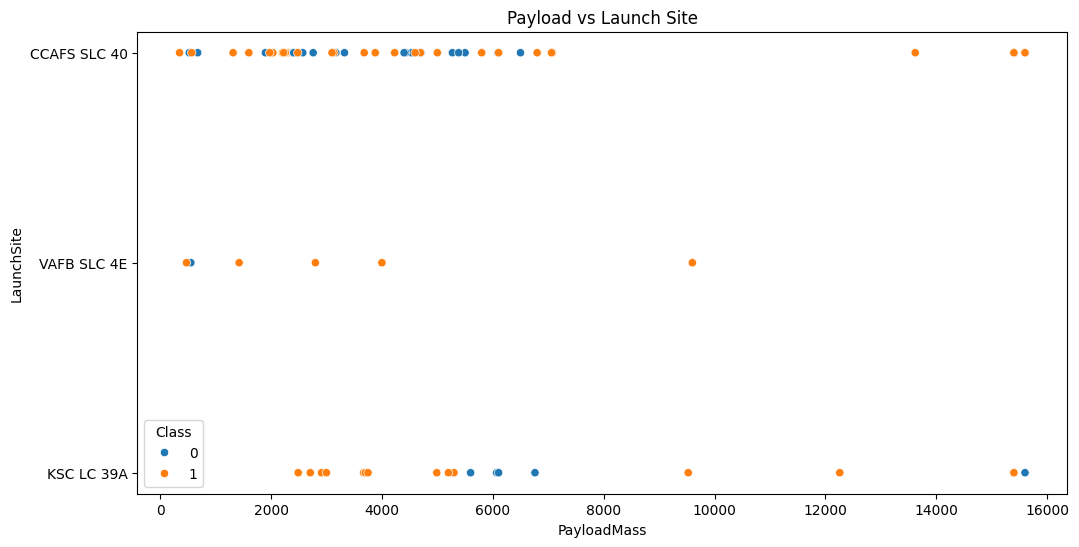

In [ ]:
# TASK 2: Visualize the relationship between Payload and Launch Site
plt.figure(figsize=(12, 6))
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.title("Payload vs Launch Site")
plt.show()



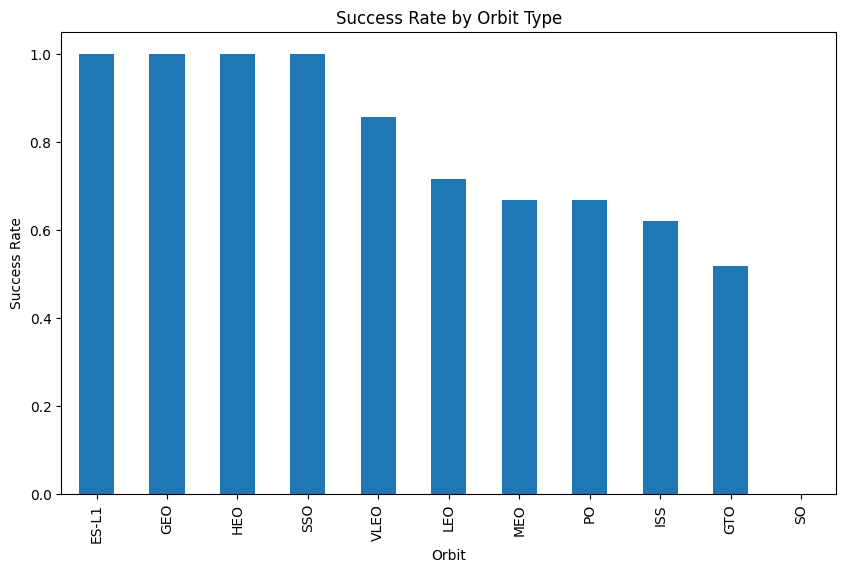

In [ ]:
# TASK 3: Visualize the relationship between success rate of each orbit type
orbit_success = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
orbit_success.plot(kind='bar')
plt.title("Success Rate by Orbit Type")
plt.ylabel("Success Rate")
plt.show()


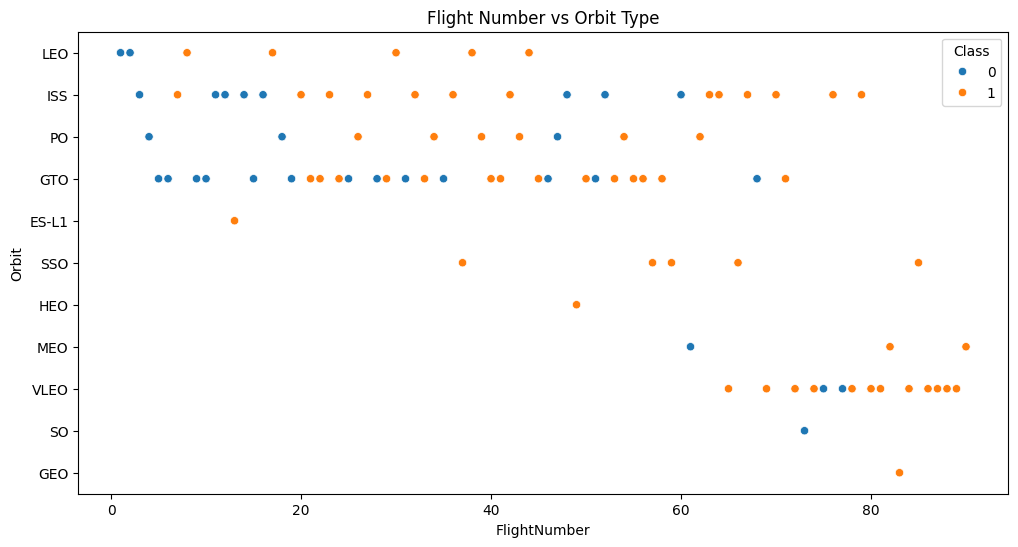

In [ ]:
# TASK 4: Visualize the relationship between FlightNumber and Orbit type
plt.figure(figsize=(12, 6))
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.title("Flight Number vs Orbit Type")
plt.show()


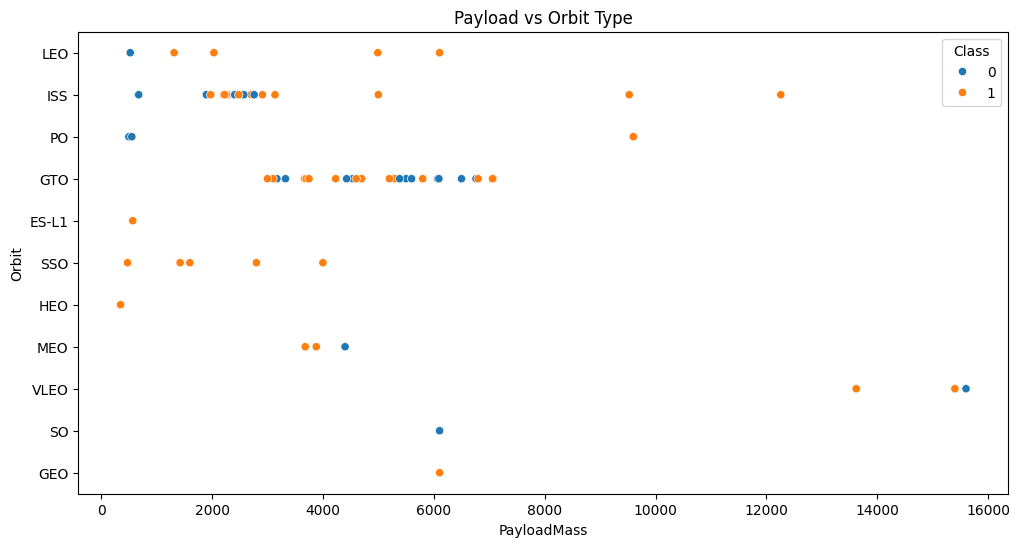

In [ ]:
# TASK 5: Visualize the relationship between Payload and Orbit type
plt.figure(figsize=(12, 6))
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.title("Payload vs Orbit Type")
plt.show()


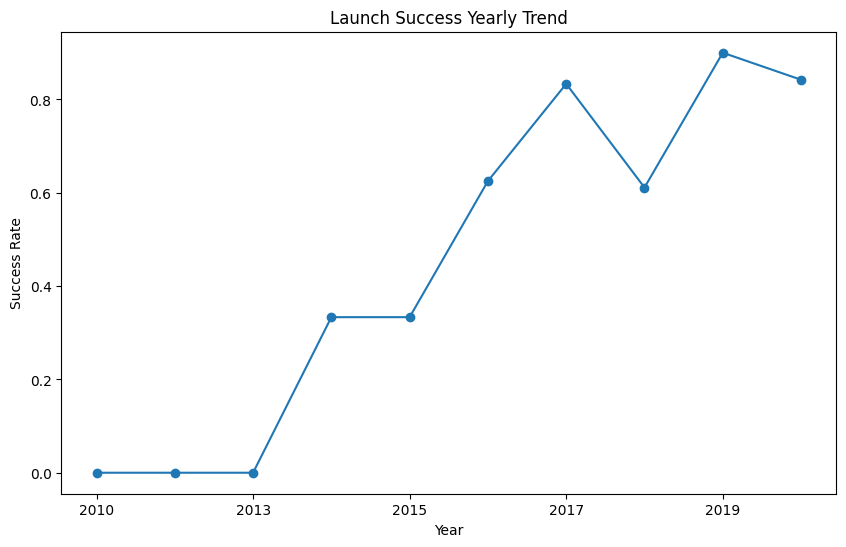

In [ ]:
# TASK 6: Visualize the launch success yearly trend
def Extract_year(date):
    return date.split("-")[0]

df['Year'] = df['Date'].apply(Extract_year)
yearly_success = df.groupby('Year')['Class'].mean()
plt.figure(figsize=(10, 6))
yearly_success.plot(kind='line', marker='o')
plt.title("Launch Success Yearly Trend")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.show()

In [ ]:
# TASK 7: Create dummy variables for categorical columns
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0            0        False      False      False      False      False   
1            0        False      False      False      False      False   
2            0        False      False      False      False       True   
3            0        False      False      False      False      False   
4            0        False      False       True      False      False   

   Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0       True      False     False     Fa

In [ ]:
# TASK 8: Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


In [ ]:
#Exporting to CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# **MODULE 3 // Interactive Map with FOLIUM**

In [ ]:
!pip install wget
import folium
import wget
import pandas as pd
from folium.plugins import MarkerCluster, MousePosition
from folium.features import DivIcon
from math import sin, cos, sqrt, atan2, radians

# Downloading  and reading the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df = pd.read_csv(spacex_csv_file)


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ec7659a2d2649b70361b2a2b006c1b5021e1913d63744fa926a4f8f6f49cc734
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Selecting relevant sub-columns
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]

# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Task 1: Mark all launch sites on the map
for index, site in launch_sites_df.iterrows():
    coordinate = [site['Lat'], site['Long']]
    folium.Circle(coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup(site['Launch Site'])).add_to(site_map)
    folium.map.Marker(
        coordinate,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 12; color:#d35400;"><b>{site["Launch Site"]}</b></div>'
        )
    ).add_to(site_map)


In [ ]:
# Task 2: Mark success/failed launches for each site
marker_cluster = MarkerCluster().add_to(site_map)

# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    return 'green' if launch_outcome == 1 else 'red'

spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)

for index, record in spacex_df.iterrows():
    folium.Marker(
        [record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=record['marker_color'])
    ).add_to(marker_cluster)


In [ ]:
# Task 3: Calculate distances and add markers
# Adding Mouse Position
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)
site_map.add_child(mouse_position)

def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c


In [ ]:
# Example for CCAFS LC-40 launch site
launch_site = launch_sites_df.iloc[0]
launch_site_lat, launch_site_lon = launch_site['Lat'], launch_site['Long']


In [ ]:
# Closest coastline point (example coordinates, you should find the actual ones)
coastline_lat, coastline_lon = 28.56367, -80.57163

distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)


In [ ]:
# Adding marker for coastline
folium.Marker(
    [coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html=f'<div style="font-size: 12; color:#d35400;"><b>{distance_coastline:.2f} KM</b></div>'
    )
).add_to(site_map)

In [ ]:
# Drawing a line between launch site and coastline
folium.PolyLine(
    locations=[[launch_site_lat, launch_site_lon], [coastline_lat, coastline_lon]],
    weight=1,
    color='red'
).add_to(site_map)

In [ ]:
# We would repeat similar steps for other points of interest (railway, highway, city)

site_map

# **MODULE 3 // Dashboard with PLOTLY DASH**

In [ ]:
!pip install --upgrade dash plotly pandas

  Using cached dash-2.18.0-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached dash-2.18.0-py3-none-any.whl (7.5 MB)
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
!pip install --upgrade werkzeug

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')

print(df.columns)

Index(['Unnamed: 0', 'Flight Number', 'Launch Site', 'class',
       'Payload Mass (kg)', 'Booster Version', 'Booster Version Category'],
      dtype='object')


In [6]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from ipywidgets import interact, widgets
from google.colab import output

# Enable Plotly in Colab
output.enable_custom_widget_manager()

# Loading the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')
max_payload = df['Payload Mass (kg)'].max()
min_payload = df['Payload Mass (kg)'].min()

# Creating pie chart
def create_pie_chart(site):
    if site == 'ALL':
        fig = px.pie(df, values='class', names='Launch Site', title='Total Success Launches By Site')
    else:
        filtered_df = df[df['Launch Site'] == site]
        fig = px.pie(filtered_df, names='class', title=f'Total Success Launches for site {site}')
    fig.show()

# Create a dropdown widget for site selection
site_dropdown = widgets.Dropdown(
    options=['ALL'] + list(df['Launch Site'].unique()),
    value='ALL',
    description='Launch Site:',
)

# Use interact to create an interactive widget
interact(create_pie_chart, site=site_dropdown)

interactive(children=(Dropdown(description='Launch Site:', options=('ALL', 'CCAFS LC-40', 'VAFB SLC-4E', 'KSC …

<function __main__.create_pie_chart(site)>

In [7]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from ipywidgets import interact, widgets
from google.colab import output

# Enable Plotly in Colab
output.enable_custom_widget_manager()

# Loading the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')
max_payload = df['Payload Mass (kg)'].max()
min_payload = df['Payload Mass (kg)'].min()

# Creating scatter plot
def create_scatter_plot(site, payload_range):
    low, high = payload_range
    mask = (df['Payload Mass (kg)'] > low) & (df['Payload Mass (kg)'] < high)

    if site == 'ALL':
        fig = px.scatter(df[mask], x="Payload Mass (kg)", y="class", color="Booster Version",
                         title='Correlation between Payload and Success for all Sites')
    else:
        filtered_df = df[mask & (df['Launch Site'] == site)]
        fig = px.scatter(filtered_df, x="Payload Mass (kg)", y="class", color="Booster Version",
                         title=f'Correlation between Payload and Success for site {site}')
    return fig

# Create widgets
site_dropdown = widgets.Dropdown(
    options=['ALL'] + list(df['Launch Site'].unique()),
    value='ALL',
    description='Launch Site:',
)

payload_slider = widgets.IntRangeSlider(
    value=[min_payload, max_payload],
    min=min_payload,
    max=max_payload,
    step=1000,
    description='Payload range:',
    continuous_update=False
)

# Function to update and display the plot
def update_plot(site, payload_range):
    fig = create_scatter_plot(site, payload_range)
    fig.show()

# Use interact for updates
interact(update_plot, site=site_dropdown, payload_range=payload_slider)

interactive(children=(Dropdown(description='Launch Site:', options=('ALL', 'CCAFS LC-40', 'VAFB SLC-4E', 'KSC …

<function __main__.update_plot(site, payload_range)>

In [8]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from ipywidgets import interact, widgets, Output
import plotly.io as pio
from IPython.display import display, clear_output

# Loading the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')
max_payload = df['Payload Mass (kg)'].max()
min_payload = df['Payload Mass (kg)'].min()

# Creating pie chart
def create_pie_chart(site):
    if site == 'ALL':
        fig = px.pie(df, values='class', names='Launch Site', title='Total Success Launches By Site')
    else:
        filtered_df = df[df['Launch Site'] == site]
        fig = px.pie(filtered_df, names='class', title=f'Total Success Launches for site {site}')
    return fig

# Creating scatter plot
def create_scatter_plot(site, payload_range):
    low, high = payload_range
    mask = (df['Payload Mass (kg)'] > low) & (df['Payload Mass (kg)'] < high)

    if site == 'ALL':
        fig = px.scatter(df[mask], x="Payload Mass (kg)", y="class", color="Booster Version",
                         title='Correlation between Payload and Success for all Sites')
    else:
        filtered_df = df[mask & (df['Launch Site'] == site)]
        fig = px.scatter(filtered_df, x="Payload Mass (kg)", y="class", color="Booster Version",
                         title=f'Correlation between Payload and Success for site {site}')
    return fig

# Interactive widgets
site_dropdown = widgets.Dropdown(
    options=[('All Sites', 'ALL')] + [(site, site) for site in df['Launch Site'].unique()],
    value='ALL',
    description='Launch Site:',
)

payload_slider = widgets.IntRangeSlider(
    value=[int(min_payload), int(max_payload)],
    min=0,
    max=int(max_payload),
    step=1000,
    description='Payload range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Output widget to manage display
output = Output()

# Interactive function
@output.capture()
def update_charts(site, payload_range):
    clear_output()
    pie_fig = create_pie_chart(site)
    scatter_fig = create_scatter_plot(site, payload_range)

    pio.show(pie_fig)
    pio.show(scatter_fig)

# Display widgets and output area
display(site_dropdown, payload_slider, output)

# Initial update
update_charts(site_dropdown.value, payload_slider.value)

# Set up interactivity
widgets.interactive(update_charts, site=site_dropdown, payload_range=payload_slider)

Dropdown(description='Launch Site:', options=(('All Sites', 'ALL'), ('CCAFS LC-40', 'CCAFS LC-40'), ('VAFB SLC…

IntRangeSlider(value=(0, 9600), continuous_update=False, description='Payload range:', max=9600, step=1000)

Output()

interactive(children=(Dropdown(description='Launch Site:', options=(('All Sites', 'ALL'), ('CCAFS LC-40', 'CCA…

In [9]:
!pip install dash jupyter-dash

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash

# Loading the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')
max_payload = df['Payload Mass (kg)'].max()
min_payload = df['Payload Mass (kg)'].min()

# Initializing the Dash app
app = JupyterDash(__name__)

# Create app layout
app.layout = html.Div([
    html.H1('SpaceX Launch Records Dashboard'),
    dcc.Dropdown(id='site-dropdown',
                 options=[{'label': 'All Sites', 'value': 'ALL'}] +
                         [{'label': site, 'value': site} for site in df['Launch Site'].unique()],
                 value='ALL',
                 placeholder="Select a Launch Site here",
                 searchable=True
                 ),
    html.Br(),
    html.Div(dcc.Graph(id='success-pie-chart')),
    html.Br(),
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(id='payload-slider',
                    min=0, max=10000, step=1000,
                    marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
                    value=[min_payload, max_payload]),
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# Callback for pie chart
@app.callback(Output('success-pie-chart', 'figure'),
              Input('site-dropdown', 'value'))
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
        fig = px.pie(df, values='class', names='Launch Site', title='Total Success Launches By Site')
    else:
        filtered_df = df[df['Launch Site'] == entered_site]
        fig = px.pie(filtered_df, names='class', title=f'Total Success Launches for site {entered_site}')
    return fig

# Callback for scatter plot
@app.callback(Output('success-payload-scatter-chart', 'figure'),
              [Input('site-dropdown', 'value'),
               Input('payload-slider', 'value')])
def get_scatter_chart(entered_site, payload_range):
    low, high = payload_range
    mask = (df['Payload Mass (kg)'] > low) & (df['Payload Mass (kg)'] < high)
    if entered_site == 'ALL':
        fig = px.scatter(df[mask], x="Payload Mass (kg)", y="class", color="Booster Version",
                         title='Correlation between Payload and Success for all Sites')
    else:
        filtered_df = df[mask & (df['Launch Site'] == entered_site)]
        fig = px.scatter(filtered_df, x="Payload Mass (kg)", y="class", color="Booster Version",
                         title=f'Correlation between Payload and Success for site {entered_site}')
    return fig

# Run the app
app.run_server(mode='inline')


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


/usr/local/lib/python3.10/dist-packages/dash/dash.py:562: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from google.colab import output
output.enable_custom_widget_manager()

# Loading the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')
max_payload = df['Payload Mass (kg)'].max()
min_payload = df['Payload Mass (kg)'].min()

# Initializing the Dash app
app = dash.Dash(__name__)

# TASK 1: Add a Launch Site Drop-down Input Component
app.layout = html.Div([
    html.H1('SpaceX Launch Records Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': 'All Sites', 'value': 'ALL'}] +
                [{'label': site, 'value': site} for site in df['Launch Site'].unique()],
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    ),
    html.Br(),
    # TASK 2: Add a pie chart to show the total successful launches count for all sites
    html.Div(dcc.Graph(id='success-pie-chart')),
    html.Br(),

    # TASK 3: Add a Range Slider to Select Payload
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=1000,
        value=[min_payload, max_payload],
        marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'}
    ),

    # TASK 4: Add a scatter chart to show the correlation between payload and launch success
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
        fig = px.pie(df, values='class', names='Launch Site', title='Total Success Launches By Site')
    else:
        filtered_df = df[df['Launch Site'] == entered_site]
        fig = px.pie(filtered_df, names='class', title=f'Total Success Launches for site {entered_site}')
    return fig

# TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
     Input(component_id="payload-slider", component_property="value")]
)
def get_scatter_chart(entered_site, payload_range):
    low, high = payload_range
    mask = (df['Payload Mass (kg)'] > low) & (df['Payload Mass (kg)'] < high)

    if entered_site == 'ALL':
        fig = px.scatter(df[mask],
                         x="Payload Mass (kg)",
                         y="class",
                         color="Booster Version",
                         title='Correlation between Payload and Success for all Sites')
    else:
        filtered_df = df[mask & (df['Launch Site'] == entered_site)]
        fig = px.scatter(filtered_df,
                         x="Payload Mass (kg)",
                         y="class",
                         color="Booster Version",
                         title=f'Correlation between Payload and Success for site {entered_site}')
    return fig

# Run the app
from google.colab import output
output.serve_kernel_port_as_iframe(8050)
app.run_server(mode='external', port=8050, dev_tools_ui=True, debug=True, dev_tools_hot_reload=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')

# 1. Site with largest successful launches
successful_launches = df[df['class'] == 1]['Launch Site'].value_counts()
print("1. Site with largest successful launches:", successful_launches.index[0])

# 2. Site with highest launch success rate
success_rate = df.groupby('Launch Site')['class'].mean()
print("2. Site with highest launch success rate:", success_rate.idxmax())

# 3 & 4. Payload ranges with highest and lowest success rates
df['payload_range'] = pd.cut(df['Payload Mass (kg)'], bins=5)
payload_success_rate = df.groupby('payload_range')['class'].mean()
print("3. Payload range with highest success rate:", payload_success_rate.idxmax())
print("4. Payload range with lowest success rate:", payload_success_rate.idxmin())

# 5. F9 Booster version with highest success rate
booster_success_rate = df.groupby('Booster Version')['class'].mean()
print("5. F9 Booster version with highest success rate:", booster_success_rate.idxmax())

1. Site with largest successful launches: KSC LC-39A
2. Site with highest launch success rate: KSC LC-39A
3. Payload range with highest success rate: (1920.0, 3840.0]
4. Payload range with lowest success rate: (5760.0, 7680.0]
5. F9 Booster version with highest success rate: F9 B4 B1039.1


<ipython-input-13-5cba9a3685c5>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# **MODULE 4 // ML PREDICTION (Predictive Analysis)**

In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

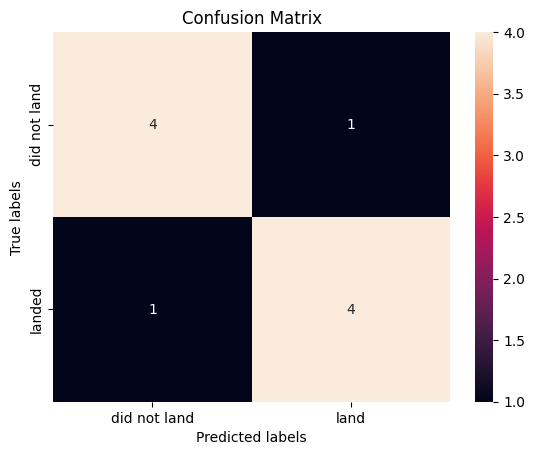

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Example usage:
# Let's create some dummy data
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0])

# Now call the function with this data
plot_confusion_matrix(y_true, y_pred)

In [ ]:
import pandas as pd

# Loading the datasets
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

data = pd.read_csv(URL1)
X = pd.read_csv(URL2)

# Displaying the first few rows of each dataset
print(data.head())
print(X.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [ ]:
import numpy as np

# TASK 1
# Create a NumPy array from the column 'Class' in 'data',
# making sure the output is a Pandas series (only one bracket df['name of column'])
Y = data['Class'].to_numpy()

# Verifying the result
print("Shape of Y:", Y.shape)
print("First few elements of Y:", Y[:5])
print("Data type of Y:", Y.dtype)

Shape of Y: (90,)
First few elements of Y: [0 0 0 0 0]
Data type of Y: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# TASK 2
# Standardize the data in X then reassign it to the variable X

# Creating a StandardScaler object
transform = StandardScaler()

# Fit the scaler to the data and transform X
X = transform.fit_transform(X)

# Verifying the result
print("Shape of X after standardization:", X.shape)
print("Mean of each feature:\n", X.mean(axis=0)[:5])  # Printing mean of first 5 features
print("Standard deviation of each feature:\n", X.std(axis=0)[:5])  # Printing std of first 5 features

Shape of X after standardization: (90, 83)
Mean of each feature:
 [ 1.48029737e-17 -1.41861831e-16 -7.27812872e-17 -1.97372982e-17
  5.92118946e-17]
Standard deviation of each feature:
 [1. 1. 1. 1. 1.]


In [ ]:
from sklearn.model_selection import train_test_split

# TASK 3
# Use the function train_test_split to split the data X and Y into training and test data
# Set the parameter test_size to 0.2 and random_state to 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# The shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (72, 83)
Shape of X_test: (18, 83)
Shape of Y_train: (72,)
Shape of Y_test: (18,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# TASK 4
# Create a logistic regression object
lr = LogisticRegression()

# Defining the parameter grid
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# Creating a GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the model
logreg_cv.fit(X_train, Y_train)

# Printing the tuned parameters and score
print("Tuned Logistic Regression Parameters:", logreg_cv.best_params_)
print("Best score:", logreg_cv.best_score_)

Tuned Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.8464285714285713


Accuracy on test data: 0.8333333333333334

Confusion Matrix:
[[ 3  3]
 [ 0 12]]


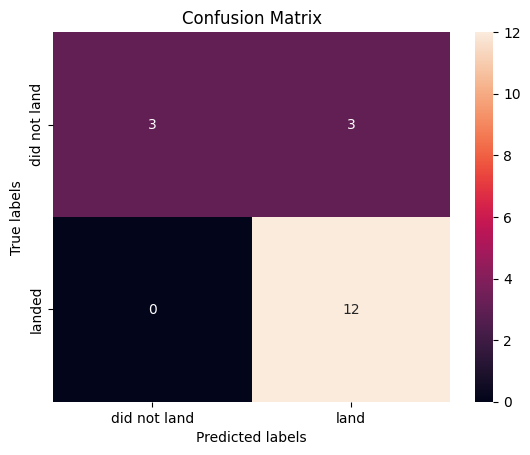

In [ ]:
# TASK 5
# Calculate the accuracy on the test data using the method score
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)

# Let's also create a confusion matrix to get more insight
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = logreg_cv.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_predict):
    "This function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(y_true, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Plotting the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# TASK 6
# Create and evaluate SVM model

# Defining the parameter grid for SVM
svm_parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
                  'C': np.logspace(-3, 3, 5),
                  'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

# Creating a GridSearchCV object for SVM
svm_cv = GridSearchCV(svm, svm_parameters, cv=10)

# Fit the SVM model
svm_cv.fit(X_train, Y_train)

print("SVM Best Parameters:", svm_cv.best_params_)
print("SVM Best Score:", svm_cv.best_score_)

# Calculating accuracy on test data
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Accuracy on test data:", svm_test_accuracy)

# Creating and evaluate Decision Tree model

# Defining the parameter grid for Decision Tree
tree_parameters = {'criterion': ['gini', 'entropy'],
                   'splitter': ['best', 'random'],
                   'max_depth': [2*n for n in range(1,10)],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

# Creating a GridSearchCV object for Decision Tree
tree_cv = GridSearchCV(tree, tree_parameters, cv=10)

# Fit the Decision Tree model
tree_cv.fit(X_train, Y_train)

print("\nDecision Tree Best Parameters:", tree_cv.best_params_)
print("Decision Tree Best Score:", tree_cv.best_score_)

# Calculating accuracy on test data
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Accuracy on test data:", tree_test_accuracy)

# Comparing all models
models = {
    "Logistic Regression": logreg_cv,
    "SVM": svm_cv,
    "Decision Tree": tree_cv
}

print("\nModel Comparison:")
for name, model in models.items():
    print(f"{name} Test Accuracy: {model.score(X_test, Y_test)}")

best_model = max(models, key=lambda x: models[x].score(X_test, Y_test))
print(f"\nThe best performing model is: {best_model}")

SVM Best Parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
SVM Best Score: 0.8482142857142856
SVM Accuracy on test data: 0.8333333333333334

Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree Best Score: 0.875
Decision Tree Accuracy on test data: 0.8333333333333334

Model Comparison:
Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.8333333333333334

The best performing model is: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

overall findings:

1. Support Vector Machine (SVM):

 Best Parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}

 Best Cross-validation Score: 0.8482142857142856

 Test Accuracy: 0.8333333333333334

2. Decision Tree:

 Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}

 Best Cross-validation Score: 0.875

 Test Accuracy: 0.8333333333333334

 Logistic Regression (from previous task):
Test Accuracy: 0.8333333333333334


 **Key observations:**
All three models (SVM, Decision Tree, and Logistic Regression) achieved the same test accuracy of approximately 83.33%.
The Decision Tree model had the highest cross-validation score (87.5%), followed by SVM (84.82%), and then Logistic Regression (84.64% from the previous task).
Despite the differences in cross-validation scores, all models performed identically on the test set, which suggests that they generalize similarly to unseen data.
The code identified Logistic Regression as the best performing model, likely due to its simplicity compared to the other models with equal performance.


There were some warnings and errors during the GridSearchCV process for the Decision Tree model, particularly related to the 'max_features' parameter. This suggests that the parameter grid for the Decision Tree might need some adjustment.

**Conclusions and recommendations:**
All three models show similar performance on this dataset, with an accuracy of about 83.33% on the test set.
Given that all models perform equally well, you might prefer the Logistic Regression model for its simplicity and interpretability.
The high consistency between cross-validation scores and test set performance suggests that the models are not overfitting.
To potentially improve performance:
We can try feature engineering or selection to identify the most important predictors.
Experiment with ensemble methods like Random Forests or Gradient Boosting.
Collect more data if possible, as this might help the models learn more complex patterns.

5. We can address the warnings for the Decision Tree model by adjusting the 'max_features' parameter in the grid search. Replace 'auto' with 'sqrt' or 'log2'.

6. We can consider the business context and the cost of false positives vs. false negatives to determine if 83.33% accuracy is sufficient for your use case.

Overall, we've successfully implemented and compared multiple machine learning models for this classification task. The consistent performance across different algorithms suggests that you've extracted most of the signal from the current feature set.

Test Accuracies:
Logistic Regression: 0.8333
SVM: 0.8333
Decision Tree: 0.8333

The best performing model is: Logistic Regression
Best model accuracy: 0.8333

Confusion Matrix:
[[ 3  3]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



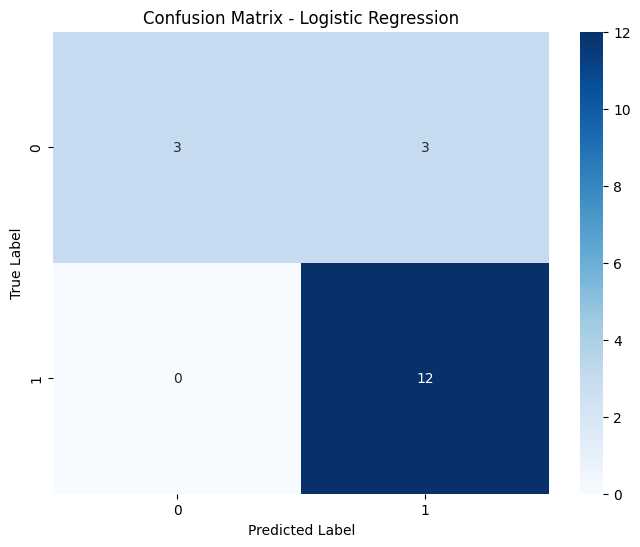

In [ ]:
# TASK 7
# Find the method that performs best using the test data

# We'll use the models we've already trained: logreg_cv, svm_cv, and tree_cv

# Dictionary to store model names and their test accuracies
model_accuracies = {
    "Logistic Regression": logreg_cv.score(X_test, Y_test),
    "SVM": svm_cv.score(X_test, Y_test),
    "Decision Tree": tree_cv.score(X_test, Y_test)
}

# Printing accuracies for all models
print("Test Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

# Finding the best performing model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"\nThe best performing model is: {best_model}")
print(f"Best model accuracy: {best_accuracy:.4f}")

# Let's also look at the confusion matrix and classification report for the best model
from sklearn.metrics import confusion_matrix, classification_report

# Get the best model
if best_model == "Logistic Regression":
    best_model_cv = logreg_cv
elif best_model == "SVM":
    best_model_cv = svm_cv
else:
    best_model_cv = tree_cv

# Make predictions
Y_pred = best_model_cv.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:")
print(class_report)

# Visualizing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best score is: 0.9
Decision Tree Test Accuracy: 0.6666666666666666

Confusion Matrix:
[[ 0  6]
 [ 0 12]]


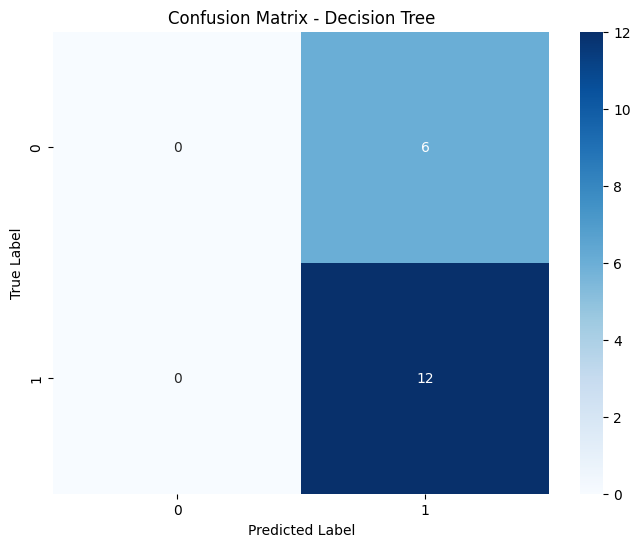

In [ ]:
# TASK 8
# Create a decision tree classifier object
from sklearn.tree import DecisionTreeClassifier

# Defining the parameter grid
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2'],  # Changed 'auto' to 'sqrt' to avoid warnings
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

# Creating a GridSearchCV object
from sklearn.model_selection import GridSearchCV

tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the model
tree_cv.fit(X_train, Y_train)

# Printing the tuned parameters and score
print("Tuned Decision Tree Parameters:", tree_cv.best_params_)
print("Best score is:", tree_cv.best_score_)

# Calculating the accuracy on the test data
test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", test_accuracy)

# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = tree_cv.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Decision Tree Test Accuracy: 0.6666666666666666

Decision Tree Confusion Matrix:
[[ 0  6]
 [ 0 12]]


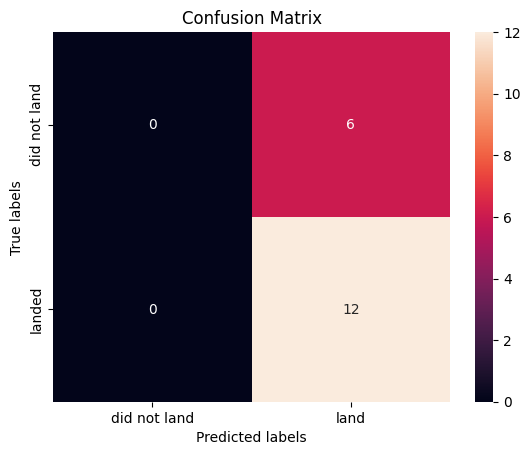

In [ ]:
# TASK 9
# Calculate the accuracy of tree_cv on the test data using the method score

test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", test_accuracy)

# We can also create a confusion matrix for a more detailed view
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = tree_cv.predict(X_test)
tree_cm = confusion_matrix(Y_test, Y_pred)
print("\nDecision Tree Confusion Matrix:")
print(tree_cm)

# Visualizing the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)

Tuned KNN Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best score is: 0.8482142857142858
KNN Test Accuracy: 0.8333333333333334

KNN Confusion Matrix:
[[ 3  3]
 [ 0 12]]


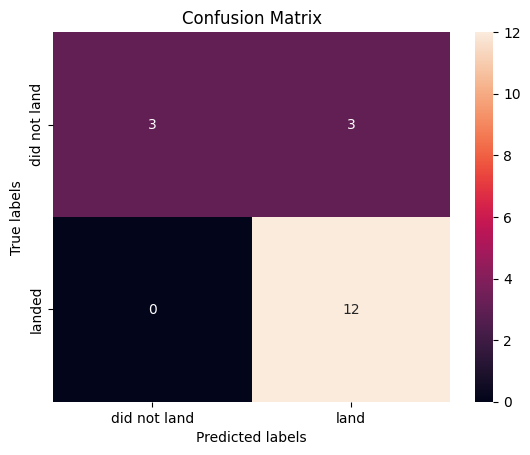

In [ ]:
# TASK 10
# Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}  # p=1 for manhattan_distance, p=2 for euclidean_distance

# Creating KNN classifier
knn = KNeighborsClassifier()

# Creating GridSearchCV object
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the model
knn_cv.fit(X_train, Y_train)

# Printing the tuned parameters and score
print("Tuned KNN Parameters:", knn_cv.best_params_)
print("Best score is:", knn_cv.best_score_)

# Calculating the accuracy on the test data
test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", test_accuracy)

# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = knn_cv.predict(X_test)
knn_cm = confusion_matrix(Y_test, Y_pred)
print("\nKNN Confusion Matrix:")
print(knn_cm)

# Visualizing the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)

KNN Test Accuracy: 0.8333333333333334

KNN Confusion Matrix:
[[ 3  3]
 [ 0 12]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



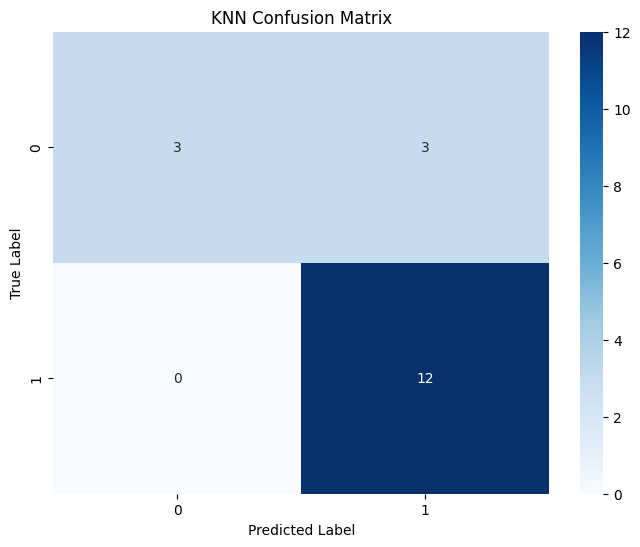

In [ ]:
# TASK 11
# Calculate the accuracy of knn_cv on the test data using the method score

# Calculating the accuracy on the test data
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", knn_test_accuracy)

# Making predictions on the test data
Y_pred_knn = knn_cv.predict(X_test)

# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn_cm = confusion_matrix(Y_test, Y_pred_knn)
print("\nKNN Confusion Matrix:")
print(knn_cm)

# Printing classification report
print("\nKNN Classification Report:")
print(classification_report(Y_test, Y_pred_knn))

# Visualizing the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(Y_test, Y_pred_knn, "KNN Confusion Matrix")

In [ ]:
# TASK 12
# Find the method that performs best

# Creating a dictionary to store the model names and their test accuracies
model_accuracies = {
    "Logistic Regression": logreg_cv.score(X_test, Y_test),
    "Support Vector Machine": svm_cv.score(X_test, Y_test),
    "Decision Tree": tree_cv.score(X_test, Y_test),
    "K-Nearest Neighbors": knn_cv.score(X_test, Y_test)
}

# Finding the best performing model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Printing the results
print("Test Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

print(f"\nThe best performing model is: {best_model}")
print(f"Best model accuracy: {best_accuracy:.4f}")

Test Accuracies:
Logistic Regression: 0.8333
Support Vector Machine: 0.8333
Decision Tree: 0.6667
K-Nearest Neighbors: 0.8333

The best performing model is: Logistic Regression
Best model accuracy: 0.8333
